# APS1070
#### Basic Principles and Models - Project 1



Project 1 has two parts: a tutorial component (which will be covered in labs) and an exercises component (to be completed as homework, individually). Overall, this project is worth 12.5% of your final grade. Completing the tutorial section is worth 2.5 marks. The exercises section will be graded out of the remaining 10 marks.

In this first lab, we will be using the popular machine learning library [scikit-learn](https://scikit-learn.org/stable/) in tandem with a popular scientific computing library in Python, [NumPy](https://www.numpy.org/), to investigate basic machine learning principles and models. The topics that will be covered in this lab include:
* Introduction to scikit-learn and NumPy
* Data preparation and cleaning with Pandas
* Exploratory data analysis (EDA)
* Nearest neighbors classification algorithm

*Note:* Some other useful Python libraries include [matplotlib](https://matplotlib.org/) (for plotting/graphing) and [Pandas](https://pandas.pydata.org/) (for data analysis), though we won't be going into detail on these in this bootcamp. 

##### Jupyter Notebooks
This lab will be using [Jupyter Notebooks](https://jupyter.org/) as a Python development environment. Hopefully you're somewhat familiar with them. Write your code in *cells* (this is a cell!) and execute your code by pressing the *play* button (up top) or by entering *ctrl+enter*. To format a cell for text, you can select "Markdown" from the dropdown - the default formatting is "Code", which will usually be what you want.

#### Getting started
Let's get started. First, we're going to test that we're able to import the required libraries.  
**>> Run the code in the next cell** to import scikit-learn and NumPy.

In [0]:
import numpy as np
import sklearn 

### NumPy Basics

Great. Let's move on to our next topic: getting a handle on NumPy basics. You can think of NumPy as sort of like a MATLAB for Python (if that helps). The main object is multidimensional arrays, and these come in particularly handy when working with data and machine learning algorithms.

Let's create a 2x4 array containing the numbers 1 through 8 and conduct some basic operations on it.  
**>> Run the code in the next cell to create and print the array.***

In [198]:
array = np.arange(8).reshape(2,4)
array

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

We can access the shape, number of dimensions, data type, and number of elements in our array as follows:  
*(Tip: use "print()" when you want a cell to output more than one thing, or you want to append text to your output, otherwise the cell will output the last object you call, as in the cell above)*

In [199]:
print ("Shape:", array.shape)
print ("Dimensions:", array.ndim)
print ("Data type:" , array.dtype.name)
print ("Number of elements:", array.size)

Shape: (2, 4)
Dimensions: 2
Data type: int64
Number of elements: 8


If we have a Python list containing a set of numbers, we can use it to create an array:  
*(Tip: if you click on a function call, such as array(), and press "shift+tab" the Notebook will provide you all the details of the function)*

In [200]:
mylist = [0, 1, 1, 2, 3, 5, 8, 13, 21]
myarray = np.array(mylist)
myarray

array([ 0,  1,  1,  2,  3,  5,  8, 13, 21])

And we can do it for nested lists as well, creating multidimensional NumPy arrays:

In [201]:
my2dlist = [[1,2,3],[4,5,6]]
my2darray = np.array(my2dlist)
my2darray

array([[1, 2, 3],
       [4, 5, 6]])

We can also index and slice NumPy arrays like we would do with a Python list or another container object as follows:

In [202]:
array = np.arange(10)
print ("Originally: ", array)
print ("First four elements: ", array[:4])
print ("After the first four elements: ", array[4:])
print ("The last element: ", array[-1])

Originally:  [0 1 2 3 4 5 6 7 8 9]
First four elements:  [0 1 2 3]
After the first four elements:  [4 5 6 7 8 9]
The last element:  9


And we can index/slice multidimensional arrays, too.

In [203]:
array = np.array([[1,2,3],[4,5,6]])
print ("Originally: ", array)
print ("First row only: ", array[0])
print ("First column only: ", array[:,0])

Originally:  [[1 2 3]
 [4 5 6]]
First row only:  [1 2 3]
First column only:  [1 4]


#### Sneak preview

Often, when designing a machine learning classifier, it can be useful to compare an array of predictions (0 or 1 values) to another array of true values. We can do this pretty easily in NumPy to compute the *accuracy* (e.g., the number of values that are the same), for example, as follows:

In [204]:
true_values = [0, 0, 1, 1, 1, 1, 1, 0, 1, 0]
predictions = [0, 0, 0, 1, 1, 1, 0, 1, 1, 0]

true_values_array = np.array(true_values)
predictions_array = np.array(predictions)

accuracy = np.sum(true_values_array == predictions_array) / true_values_array.size
print ("Accuracy: ", accuracy * 100, "%")

Accuracy:  70.0 %


In the previous cell, we took two Python lists, converted them to NumPy arrays, and then used a combination of np.sum() and .size to compute the accuracy (proportion of elements that are pairwise equal). A tiny bit more advanced, but demonstrates the power of NumPy arrays.

You'll notice we didn't used nested loops to conduct the comparison, but instead used the np.sum() function. This is an example of a vectorized operation within NumPy that is much more efficient when dealing with large datasets.

### Pandas basics

Pandas is an incredibly useful library that allows us to work with large datasets in Python. It contains myriad useful tools, and is highly compatible with other libraries like Scikit-learn, so you don't have to spend any time getting the two to play nicely together.

First we are going to load a dataset with Pandas:

In [205]:
!pip install wget

In [206]:
import wget

wget.download(
    'https://github.com/alexwolson/APS1070_data/raw/master/arabica_data.csv',
    'arabica_data.csv'
)

'arabica_data (4).csv'

In [0]:
import pandas as pd

df = pd.read_csv('arabica_data.csv')

With Pandas, the main object we work with is referred to as a _DataFrame_ (hence calling our object here df). A DataFrame stores our dataset in a way that immediately gives us a lot of power to interact with it. If you just put the DataFrame in a cell on its own, you instantly get a clear, easy to read preview of the data you have:

In [208]:
df

,Unnamed: 0,Acidity,Aftertaste,Aroma,Bag Weight,Balance,Body,Category.One.Defects,Category.Two.Defects,Clean Cup,Color,Company,Country of Origin,Cupper Points,Expiration,Farm Name,Flavor,Grading Date,Harvest Year,ICO Number,In-Country Partner,Mill,Moisture,Number of Bags,Processing Method,Producer,Region,Species,Sweetness,Uniformity,Variety,altitude_high_meters,altitude_low_meters,altitude_mean_meters,quality_score
0,0,8.75,8.67,8.67,60 kg,8.42,8.50,0,0,10.00,Green,metad agricultural developmet plc,Ethiopia,8.75,"April 3rd, 2016",METAD PLC,8.83,"April 4th, 2015",2014,2014/2015,METAD Agricultural Development plc,metad plc,0.12,300,Washed / Wet,METAD PLC,guji-hambela,Arabica,10.00,10.00,NaN,2200.00,1950.00,2075.00,90.58
1,1,8.58,8.50,8.75,60 kg,8.42,8.42,0,1,10.00,Green,metad agricultural developmet plc,Ethiopia,8.58,"April 3rd, 2016",METAD PLC,8.67,"April 4th, 2015",2014,2014/2015,METAD Agricultural Development plc,metad plc,0.12,300,Washed / Wet,METAD PLC,guji-hambela,Arabica,10.00,10.00,Other,2200.00,1950.00,2075.00,89.92
2,2,8.42,8.42,8.42,1,8.42,8.33,0,0,10.00,NaN,NaN,Guatemala,9.25,"May 31st, 2011","San Marcos Barrancas ""San Cristobal Cuch",8.50,"May 31st, 2010",NaN,NaN,Specialty Coffee Association,NaN,0.00,5,NaN,NaN,NaN,Arabica,10.00,10.00,Bourbon,1800.00,1600.00,1700.00,89.75
3,3,8.42,8.42,8.17,60 kg,8.25,8.50,0,2,10.00,Green,yidnekachew debessa coffee plantation,Ethiopia,8.67,"March 25th, 2016",Yidnekachew Dabessa Coffee Plantation,8.58,"March 26th, 2015",2014,NaN,METAD Agricultural Development plc,wolensu,0.11,320,Natural / Dry,Yidnekachew Dabessa Coffee Plantation,oromia,Arabica,10.00,10.00,NaN,2200.00,1800.00,2000.00,89.00
4,4,8.50,8.25,8.25,60 kg,8.33,8.42,0,2,10.00,Green,metad agricultural developmet plc,Ethiopia,8.58,"April 3rd, 2016",METAD PLC,8.50,"April 4th, 2015",2014,2014/2015,METAD Agricultural Development plc,metad plc,0.12,300,Washed / Wet,METAD PLC,guji-hambela,Arabica,10.00,10.00,Other,2200.00,1950.00,2075.00,88.83
5,5,8.50,8.42,8.58,30 kg,8.33,8.25,0,1,10.00,Bluish-Green,NaN,Brazil,8.33,"September 3rd, 2014",NaN,8.42,"September 3rd, 2013",2013,NaN,Specialty Coffee Institute of Asia,NaN,0.11,100,Natural / Dry,NaN,NaN,Arabica,10.00,10.00,NaN,NaN,NaN,NaN,88.83
6,6,8.50,8.33,8.42,69 kg,8.25,8.25,0,0,10.00,Bluish-Green,richmond investment-coffee department,Peru,8.50,"September 17th, 2013",NaN,8.50,"September 17th, 2012",2012,NaN,Specialty Coffee Institute of Asia,hvc,0.11,100,Washed / Wet,HVC,NaN,Arabica,10.00,10.00,Other,NaN,NaN,NaN,88.75
7,7,8.42,8.50,8.25,60 kg,8.50,8.33,0,0,10.00,NaN,NaN,Ethiopia,9.00,"September 2nd, 2011",Aolme,8.33,"September 2nd, 2010",March 2010,010/0338,Ethiopia Commodity Exchange,c.p.w.e,0.03,300,NaN,Bazen Agricultural & Industrial Dev't Plc,oromia,Arabica,9.33,10.00,NaN,1700.00,1570.00,1635.00,88.67
8,8,8.42,8.58,8.67,60 kg,8.42,8.33,0,0,10.00,NaN,NaN,Ethiopia,8.67,"September 2nd, 2011",Aolme,8.67,"September 2nd, 2010",March 2010,010/0338,Ethiopia Commodity Exchange,c.p.w.e,0.03,300,NaN,Bazen Agricultural & Industrial Dev't Plc,oromiya,Arabica,9.33,9.33,NaN,1700.00,1570.00,1635.00,88.42
9,9,8.50,8.50,8.08,60 kg,8.42,7.67,0,4,10.00,Green,diamond enterprise plc,Ethiopia,8.50,"March 29th, 2016",Tulla Coffee Farm,8.58,"March 30th, 2015",2014,2014/15,METAD Agricultural Development plc,tulla coffee farm,0.10,50,Natural / Dry,Diamond Enterprise Plc,"snnp/kaffa zone,gimbowereda",Arabica,10.00,10.00,Other,1850.00,1795.00,1822.50,88.25


But even though this is printed out well, the dataset is a bit too large for this view to be anything but overwhelming. Luckily, Pandas allows us to easily get some summary statistics about our data.

In [209]:
df.describe()

,Unnamed: 0,Acidity,Aftertaste,Aroma,Balance,Body,Category.One.Defects,Category.Two.Defects,Clean Cup,Cupper Points,Flavor,Moisture,Number of Bags,Sweetness,Uniformity,altitude_high_meters,altitude_low_meters,altitude_mean_meters,quality_score
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1084.000000,1084.000000,1084.000000,1311.000000
mean,655.000000,7.538764,7.403158,7.569527,7.523288,7.523387,0.450038,3.626240,9.83312,7.502441,7.523539,0.088963,153.678108,9.910900,9.839497,1808.751552,1759.456703,1784.104128,82.148825
std,378.597412,0.319773,0.349945,0.315930,0.349174,0.293089,2.017571,5.482857,0.77135,0.428989,0.341817,0.047907,129.760079,0.454824,0.491508,8767.192330,8767.851565,8767.021485,2.893505
min,0.000000,5.250000,6.170000,5.080000,6.080000,5.250000,0.000000,0.000000,0.00000,5.170000,6.080000,0.000000,0.000000,1.330000,6.000000,1.000000,1.000000,1.000000,43.130000
25%,327.500000,7.330000,7.250000,7.420000,7.330000,7.330000,0.000000,0.000000,10.00000,7.250000,7.330000,0.090000,14.000000,10.000000,10.000000,1100.000000,1100.000000,1100.000000,81.170000
50%,655.000000,7.500000,7.420000,7.580000,7.500000,7.500000,0.000000,2.000000,10.00000,7.500000,7.580000,0.110000,170.000000,10.000000,10.000000,1350.000000,1310.640000,1310.640000,82.500000
75%,982.500000,7.750000,7.580000,7.750000,7.750000,7.670000,0.000000,4.000000,10.00000,7.750000,7.750000,0.120000,275.000000,10.000000,10.000000,1650.000000,1600.000000,1600.000000,83.670000
max,1310.000000,8.750000,8.670000,8.750000,8.750000,8.580000,31.000000,55.000000,10.00000,10.000000,8.830000,0.280000,1062.000000,10.000000,10.000000,190164.000000,190164.000000,190164.000000,90.580000


Let's say we want to zero in on a single column. This is done the same way that you access a dictionary entry:

In [210]:
df['Species']

0       Arabica
1       Arabica
2       Arabica
3       Arabica
4       Arabica
5       Arabica
6       Arabica
7       Arabica
8       Arabica
9       Arabica
10      Arabica
11      Arabica
12      Arabica
13      Arabica
14      Arabica
15      Arabica
16      Arabica
17      Arabica
18      Arabica
19      Arabica
20      Arabica
21      Arabica
22      Arabica
23      Arabica
24      Arabica
25      Arabica
26      Arabica
27      Arabica
28      Arabica
29      Arabica
         ...   
1281    Arabica
1282    Arabica
1283    Arabica
1284    Arabica
1285    Arabica
1286    Arabica
1287    Arabica
1288    Arabica
1289    Arabica
1290    Arabica
1291    Arabica
1292    Arabica
1293    Arabica
1294    Arabica
1295    Arabica
1296    Arabica
1297    Arabica
1298    Arabica
1299    Arabica
1300    Arabica
1301    Arabica
1302    Arabica
1303    Arabica
1304    Arabica
1305    Arabica
1306    Arabica
1307    Arabica
1308    Arabica
1309    Arabica
1310    Arabica
Name: Species, Length: 1

Using this method of column access on its own returns a `series` object - think of this as a DataFrame with only one column. If you want to get the raw values however, you can simply specify this by adding `.values` after your entry. Using this, and by putting the object in a `Set` (which does not allow duplicate entries), we can quickly see all of the possible values for any column:

In [211]:
set(df['Variety'].values)

{'Arusha',
 'Blue Mountain',
 'Bourbon',
 'Catimor',
 'Catuai',
 'Caturra',
 'Ethiopian Heirlooms',
 'Ethiopian Yirgacheffe',
 'Gesha',
 'Hawaiian Kona',
 'Java',
 'Mandheling',
 'Marigojipe',
 'Moka Peaberry',
 'Mundo Novo',
 'Other',
 'Pacamara',
 'Pacas',
 'Pache Comun',
 'Peaberry',
 'Ruiru 11',
 'SL14',
 'SL28',
 'SL34',
 'Sulawesi',
 'Sumatra',
 'Sumatra Lintong',
 'Typica',
 'Yellow Bourbon',
 nan}

You may notice that the final entry in this set isn't like the others - it's `nan`, which in Pandas denotes a missing entry. When working with real world datasets it's very common for entries to be missing, and there are a variety of ways of approaching a problem like this. For now, though, we are simply going to tell Pandas to drop any row that has a missing column, using the `dropna()` method.

In [0]:
df_clean = df.dropna()

**YOUR TURN** How many entries did we lose by dropping all `nan`s?

* What percentage of entries are left in `df_clean`? 41.27%
* What column had the highest number of `nan` entries? (This can be done in one line - use Google!) Farm Name

In [213]:
entriesleft = df_clean.shape[0] / df.shape[0]
print ("Entriesleft: ",entriesleft * 100, "%")

print ("Column with highest number of nan entries: ", df.isna().sum().idxmax())

Entriesleft:  41.26620900076278 %
Column with highest number of nan entries:  Farm Name


As you perform this analysis, you will probably notice that we've lost _quite a bit_ of our original data by simply dropping the `nan` values. There is another approach that we can examine, however. Instead of dropping the missing entries entirely, we can _impute_ their value using the data we do have. For a single column we can do this like so:

In [0]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(
    missing_values=np.nan,
    strategy='mean',
    verbose=1
)

imp.fit(
    df['altitude_mean_meters'].values.reshape((-1,1)) #we have to do the reshape operation because we are only using one feature.
)

df['altitude_mean_meters_imputed'] = imp.transform(df['altitude_mean_meters'].values.reshape((-1,1)))

In [215]:
df[['altitude_mean_meters','altitude_mean_meters_imputed']].head(10)

,altitude_mean_meters,altitude_mean_meters_imputed
0,2075.0,2075.000000
1,2075.0,2075.000000
2,1700.0,1700.000000
3,2000.0,2000.000000
4,2075.0,2075.000000
5,NaN,1784.104128
6,NaN,1784.104128
7,1635.0,1635.000000
8,1635.0,1635.000000
9,1822.5,1822.500000


OK, great! Now we have replaced the useless NaN values with the average height. While this obviously isn't as good as original data, in a lot of situations this can be a step up from losing rows entirely. 

Sophisticated analysis can be done in only a few lines using Pandas. Let's say that we want to get the average coffee rating by country. First, we can use the `groupby` method to automatically collect the results by country. Then, we can select the column we want - `quality_score` - and calculate its mean the same way we would using NumPy:

In [216]:
df_clean.groupby('Country of Origin')['quality_score'].mean()

Country of Origin
Brazil                          82.330725
China                           80.868000
Colombia                        82.932000
Costa Rica                      83.090000
El Salvador                     82.804545
Ethiopia                        87.792500
Guatemala                       81.957832
Haiti                           80.750000
Honduras                        81.010476
Indonesia                       81.524286
Kenya                           85.415000
Laos                            82.000000
Malawi                          81.711818
Mexico                          80.246087
Myanmar                         80.666667
Nicaragua                       79.333000
Panama                          81.750000
Peru                            77.000000
Philippines                     80.312500
Taiwan                          82.462895
Tanzania, United Republic Of    82.411724
Uganda                          83.778333
Name: quality_score, dtype: float64

This is certainly interesting, but it could be presented better. First, all of the ratings are pretty high (what's the highest and lowest rating?). Let's standardize to unit mean and variance so that we can tell the difference more easily. We'll just do that on our subset here for now, but you can apply it to the entire dataset too!

In [217]:
country_means = df_clean.groupby('Country of Origin')['quality_score'].mean()
mu,si = country_means.mean(), country_means.std() #Calculate the overall mean and standard deviation of the quality scores
country_means -= mu #Subtract the mean from every entry
country_means /= si #Divide every entry by the standard deviation
country_means

Country of Origin
Brazil                          0.194625
China                          -0.491541
Colombia                        0.476684
Costa Rica                      0.550802
El Salvador                     0.416895
Ethiopia                        2.756749
Guatemala                       0.019701
Haiti                          -0.546895
Honduras                       -0.424705
Indonesia                      -0.183677
Kenya                           1.641462
Laos                            0.039482
Malawi                         -0.095705
Mexico                         -0.783281
Myanmar                        -0.585987
Nicaragua                      -1.211611
Panama                         -0.077794
Peru                           -2.306024
Philippines                    -0.752127
Taiwan                          0.256626
Tanzania, United Republic Of    0.232622
Uganda                          0.873700
Name: quality_score, dtype: float64

This is a lot clearer! Finally, let's sort this list so that it's easier to compare entries.

In [218]:
country_means.sort_values()

Country of Origin
Peru                           -2.306024
Nicaragua                      -1.211611
Mexico                         -0.783281
Philippines                    -0.752127
Myanmar                        -0.585987
Haiti                          -0.546895
China                          -0.491541
Honduras                       -0.424705
Indonesia                      -0.183677
Malawi                         -0.095705
Panama                         -0.077794
Guatemala                       0.019701
Laos                            0.039482
Brazil                          0.194625
Tanzania, United Republic Of    0.232622
Taiwan                          0.256626
El Salvador                     0.416895
Colombia                        0.476684
Costa Rica                      0.550802
Uganda                          0.873700
Kenya                           1.641462
Ethiopia                        2.756749
Name: quality_score, dtype: float64

Finally, we'll look at indexing using Pandas. Let's say that we want to only look at the coffee entries from Taiwan. We can use the following syntax to identify those rows:

In [219]:
df_clean[df_clean['Country of Origin'] == 'Taiwan']

,Unnamed: 0,Acidity,Aftertaste,Aroma,Bag Weight,Balance,Body,Category.One.Defects,Category.Two.Defects,Clean Cup,Color,Company,Country of Origin,Cupper Points,Expiration,Farm Name,Flavor,Grading Date,Harvest Year,ICO Number,In-Country Partner,Mill,Moisture,Number of Bags,Processing Method,Producer,Region,Species,Sweetness,Uniformity,Variety,altitude_high_meters,altitude_low_meters,altitude_mean_meters,quality_score
29,29,8.25,8.00,8.00,50 kg,8.17,8.00,0,0,10.00,Green,taiwan coffee laboratory,Taiwan,8.17,"May 18th, 2017",Tsoustructive Garden 鄒築園,8.00,"May 18th, 2016",2015,Taiwan,Specialty Coffee Association,tsoustructive garden 鄒築園,0.00,20,Pulped natural / honey,"FANG,ZHENG-LUN 方政倫","leye, alishan township, chiayi county",Arabica,10.00,10.00,Sumatra,1200.00,1200.00,1200.00,86.58
43,43,8.08,7.75,8.08,15 kg,7.83,7.75,0,0,10.00,Green,taiwan coffee laboratory,Taiwan,8.42,"June 9th, 2016",Sunshine Valley Estate 向陽高山咖啡,8.17,"June 10th, 2015",2015,Taiwan,Specialty Coffee Association,sunshine valley estate 向陽高山咖啡,0.12,10,Semi-washed / Semi-pulped,LIN YEN CHIEN 林言謙,natou county,Arabica,10.00,10.00,Bourbon,1000.00,1000.00,1000.00,86.08
108,108,7.58,8.00,7.67,40 kg,7.92,8.00,0,0,10.00,Green,taiwan coffee laboratory,Taiwan,7.92,"June 8th, 2016",Baishengcun Coffee 百勝村咖啡莊園,7.83,"June 9th, 2015",2015,Taiwan,Specialty Coffee Association,baishengcun coffee 百勝村咖啡莊園,0.11,20,Semi-washed / Semi-pulped,SU CHUEN SHIAN 蘇春賢,natou county,Arabica,10.00,10.00,Typica,800.00,800.00,800.00,84.92
115,115,7.83,7.83,7.92,20 kg,7.83,7.83,0,0,10.00,Green,taiwan coffee laboratory,Taiwan,8.00,"May 18th, 2017",Shi Fang Yuan 十方源,7.58,"May 18th, 2016",2016,Taiwan,Specialty Coffee Association,shi fang yuan 十方源,0.00,10,Natural / Dry,Wang Chao Yung 王超永,"dongshan dist., tainan city 臺南市東山區",Arabica,10.00,10.00,Typica,350.00,350.00,350.00,84.83
175,175,8.00,7.75,7.83,2 kg,7.75,7.50,0,0,10.00,Blue-Green,tropica galliard,Taiwan,7.75,"July 10th, 2014",Tropica Galliard,7.83,"July 10th, 2013",2012,Taiwan,Specialty Coffee Association,tropica galliard,0.11,2,Washed / Wet,Kao Ming Lee,"mountain ali, taiwan",Arabica,10.00,10.00,Typica,1200.00,1200.00,1200.00,84.42
191,191,7.67,7.75,7.92,5 kg,7.83,7.67,0,0,10.00,Blue-Green,taiwan coffee laboratory,Taiwan,7.67,"August 10th, 2018",馨晴咖啡 Good Mood Coffee,7.75,"August 10th, 2017",2016,Taiwan,Specialty Coffee Association,馨晴咖啡 good mood coffee,0.12,10,Washed / Wet,黃美桃 Huang Mei Tao,國姓鄉 guoshing township,Arabica,10.00,10.00,Typica,1000.00,1000.00,1000.00,84.25
233,233,7.67,7.67,7.58,20 kg,7.83,7.75,0,4,10.00,Bluish-Green,taiwan coffee laboratory,Taiwan,7.92,"May 18th, 2017",CHANG YU LIANG 張玉良,7.67,"May 18th, 2016",2016,Taiwan,Specialty Coffee Association,chang yu liang 張玉良,0.10,10,Washed / Wet,CHANG YU LIANG 張玉良,"nanxi dist., tainan city 臺南市楠西區",Arabica,10.00,10.00,Typica,968.00,968.00,968.00,84.08
262,262,7.75,7.83,7.83,50 kg,7.75,7.83,0,3,10.00,Green,taiwan coffee laboratory,Taiwan,7.83,"May 18th, 2017",Tsoustructive Garden 鄒築園,7.75,"May 18th, 2016",2015,Taiwan,Specialty Coffee Association,tsoustructive garden 鄒築園,0.11,20,Washed / Wet,"FANG,ZHENG-LUN 方政倫","leye, alishan township, chiayi county 嘉義阿里山樂野村",Arabica,10.00,9.33,Typica,1200.00,1200.00,1200.00,83.92
269,269,7.92,7.92,8.00,60 kg,7.33,7.67,0,0,10.00,Green,宸嶧國際,Taiwan,7.17,"November 23rd, 2015",神谷山莊園,7.92,"November 23rd, 2014",2014,Taiwan台灣,Blossom Valley International,神谷山莊園,0.06,10,Washed / Wet,張瑞宏,台中和平區,Arabica,10.00,10.00,Typica,950.00,950.00,950.00,83.92
280,280,7.75,7.67,7.67,18 kg,7.75,7.42,0,1,10.00,Green,taiwan coffee laboratory,Taiwan,7.83,"April 29th, 2016",鄉舍咖啡 Hometown Coffee,7.75,"April 30th, 2015",2014,Taiwan,Specialty Coffee Association,鄉舍咖啡 hometown coffee,0.00,8,Washed / Wet,ZENG JIAN NAN 曾建男,"dongshan dist., tainan city 臺南市東山區",Arabica,10.00,10.00,Typica,570.00,480.00,525.00,83.83


Say that out of the Taiwanese coffees, we only want to look at those which are the Bourbon variety. We can also chain those indexing operations like so:

In [220]:
df_clean[df_clean['Country of Origin'] == 'Taiwan'][df_clean['Variety'] == 'Bourbon']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Acidity,Aftertaste,Aroma,Bag Weight,Balance,Body,Category.One.Defects,Category.Two.Defects,Clean Cup,Color,Company,Country of Origin,Cupper Points,Expiration,Farm Name,Flavor,Grading Date,Harvest Year,ICO Number,In-Country Partner,Mill,Moisture,Number of Bags,Processing Method,Producer,Region,Species,Sweetness,Uniformity,Variety,altitude_high_meters,altitude_low_meters,altitude_mean_meters,quality_score
43,43,8.08,7.75,8.08,15 kg,7.83,7.75,0,0,10.00,Green,taiwan coffee laboratory,Taiwan,8.42,"June 9th, 2016",Sunshine Valley Estate 向陽高山咖啡,8.17,"June 10th, 2015",2015,Taiwan,Specialty Coffee Association,sunshine valley estate 向陽高山咖啡,0.12,10,Semi-washed / Semi-pulped,LIN YEN CHIEN 林言謙,natou county,Arabica,10.0,10.0,Bourbon,1000.00,1000.00,1000.00,86.08
425,425,7.50,7.50,7.67,15 kg,7.83,7.67,0,0,10.00,Blue-Green,taiwan coffee laboratory,Taiwan,7.58,"June 17th, 2016",Sunshine Valley Estate 向陽高山咖啡,7.50,"June 18th, 2015",2015,Taiwan,Specialty Coffee Association,sunshine valley estate 向陽高山咖啡,0.10,10,Washed / Wet,LIN YEN CHIEN 林言謙,natou county,Arabica,10.0,10.0,Bourbon,1000.00,1000.00,1000.00,83.25
1249,1249,7.17,6.67,7.00,10 kg,6.83,6.83,0,2,9.33,Green,"unex guatemala, s.a.",Taiwan,6.67,"February 7th, 2014",Dongshan Gaoyuan village chief manor coffee Ta...,6.83,"May 29th, 2013",2012,Taiwan,Specialty Coffee Association,beneficio ixchel,0.11,100,Washed / Wet,LUIS RODRIGUEZ,oriente,Arabica,10.0,10.0,Bourbon,1310.64,1310.64,1310.64,77.67


### Scikit-learn Basics

Scikit-learn is a great library to use for doing machine learning in Python. Data preparation, exploratory data analysis (EDA), classification, regression, clustering; it has it all. 

Scikit-learn usually expects data to be in the form of a 2D matrix with dimensions *n_samples x n_features* with an additional column for the target. To get acquainted with scikit-learn, we are going to use the [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris), one of the most famous datasets in pattern recognition. 

Each entry in the dataset represents an iris plant, and is categorized as: 

* Setosa (class 0)
* Versicolor (class 1)
* Virginica (class 2)

These represent the target classes to predict. Each entry also includes a set of features, namely:

* Sepal width (cm)
* Sepal length (cm)
* Petal length (cm)
* Petal width (cm)

In the context of machine learning classification, the remainder of the lab is going to investigate the following question:  
*Can we design a model that, based on the iris sample features, can accurately predict the iris sample class? *

Scikit-learn has a copy of the iris dataset readily importable for us. Let's grab it now and conduct some EDA.

In [0]:
from sklearn.datasets import load_iris
iris_data = load_iris()
feature_data = iris_data.data

**YOUR TURN:** "feature_data" now contains the feature data for all of the iris samples. 
* What is the shape of this feature data?  150 by 4
* The data type? float64
* How many samples are there? 150
* How many features are there? 4

In [222]:
print ("Shape:", feature_data.shape)
print ("Data type:" , feature_data.dtype.name)
print ("Number of samples:", feature_data.shape[0])
print ("Number of features:", feature_data.shape[1])

Shape: (150, 4)
Data type: float64
Number of samples: 150
Number of features: 4


Next, we will save the target classification data in a similar fashion.

In [0]:
target_data = iris_data.target
target_names = iris_data.target_names

**YOUR TURN:**
* What values are in "target_data"? 0, 1, 2
* What is the data type? int64
* What values are in "target_names"? 'setosa', 'versicolor', 'virginica'
* What is the data type? str320
* How many samples are of type "setosa"? 50

In [224]:
print ("Data type:" , target_data.dtype.name)

print ("Data type:" , target_names.dtype.name)
print("No. of samples of type setosa: ", sum(target_data == 0))


Data type: int64
Data type: str320
No. of samples of type setosa:  50


We can also do some more visual EDA by plotting the samples according to a subset of the features and coloring the data points to coincide with the sample classification. We will use [matplotlib](https://matplotlib.org/), a powerful plotting library within Python, to accomplish this.

For example, lets plot sepal width vs. sepal length.


In [0]:
import matplotlib.pyplot as plt

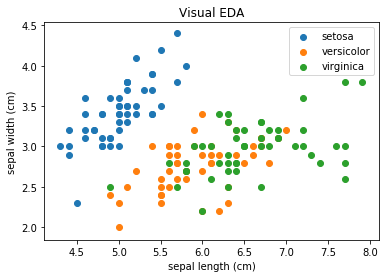

In [226]:
setosa = feature_data[target_data==0]
versicolor = feature_data[target_data==1]
virginica = feature_data[target_data==2]

plt.scatter(setosa[:,0], setosa[:,1], label="setosa")
plt.scatter(versicolor[:,0], versicolor[:,1], label="versicolor")
plt.scatter(virginica[:,0], virginica[:,1], label="virginica")

plt.legend()
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Visual EDA");

In the above step, we used boolean indexing to filter the feature data based on the target data class. This allowed us to create a scatter plot for each of the iris classes and distinguish them by color.

*Observations*: We can see that the "setosa" class typically consists of medium-to-high sepal width with low-to-medium sepal length, while the other two classes have lower width and higher length. The "virginica" class appears to have the largest combination of the two. 

**YOUR TURN:** 
* Which of the iris classes is seperable based on sepal characteristics? _Setosa_
* Which of the iris classes is not? _Verseicolor and Virginica_
* Can we (easily) visualize each of the samples w.r.t. all features on the same plot? Why/why not? _No, because not all of them are separable._

### Creating a Nearest Neighbors Classifier

Now that we've explored the data a little bit, we're going to use scikit-learn to create a nearest neighbors classifier for the data. Effectively we'll be developing a model whose job it is to build a relationship over input feature data (sepal and petal characteristics) that predicts the iris sample class (e.g. "setosa"). This is an example of a *supervised learning* task; we have all the features and all the target classes.

Model creation in scikit-learn follows a **data prep -> fit -> predict** process. The "fit" function is where the actual model is trained and parameter values are selected, while the "predict" function actually takes the trained model and applies it to the new samples.

First, we load the nearest neighbor library from scikit-learn:

In [0]:
from sklearn import neighbors

Now, we're going to save our feature data into an array called 'X' and our target data into an array called 'y'. We don't *need* to do this, but it is traditional to think of the problem using this notation.

In [0]:
X = feature_data
y = target_data

Next, we create our nearest neighbor classifier object:

In [0]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

And then we *fit* it to the data (i.e., train the classifier).

In [230]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Now we have a model! If you're new to this, you've officially built your first machine learning model. If you use "knn.predict(*[[feature array here]]*)", you can use your trained model to predict the class of a new iris sample. 

**YOUR TURN:**
* What is the predicted class of a new iris sample with feature vector [3,4,5,2]? What is its name? _Class 2: Virginica_
* Do you think this model is overfit or underfit to the iris dataset? Why? I think it's underfit as it only considers 1 neighbor when predicting.
* How many neighbors does our model consider when classifying a new sample? 1

In [231]:
knn.predict([[3,4,5,2]])

array([2])

As you may have noted in the previous cell, we've trained this classifier on our *entire dataset*. This typically isn't done in practice and results in overfitting to the data. Here's a bit of a tricky question:

**YOUR TURN:**
* If we use our classifier to predict the classes of the iris samples that were used to train the model itself, what will our overall accuracy be? ________100%________

We can validate our hypothesis fairly easily using either: i) the NumPy technique for calculating accuracy we used earlier in the lab, or ii) scikit-learn's in-house "accuracy_score()" function.

Let's use our technique first:

In [232]:
accuracy = np.sum(target_data == knn.predict(feature_data)) / target_data.size
print ("Accuracy: ", accuracy * 100, "%")

Accuracy:  100.0 %


and then using scikit-learn's customized function:

In [233]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(target_data, knn.predict(feature_data))
print ("Accuracy: ", accuracy * 100, "%")

Accuracy:  100.0 %


We see that our classifier has achieved 100% accuracy (and both calculation methods agree)!

**DISCUSSION:** 
* Why do you think the model was able to achieve such a "great" result? Because it is trained and tested on the same dataset
* What does this really tell us? A separate dataset different from the training dataset is needed to test the accuracy of the model.
* Do you expect the model to perform this well on new data? No, because the model is underfit.

### Exercises (to be completed on your own)

Let's take the tools we have learned in this lab and put them into practice on a new dataset.

We're going to work with a dataset focused on diabetes. It contains a variety of health metrics for a number of patients, and then in a second object it shows whether or not that patient had diabetes. Download it using the cell below:

In [0]:
from sklearn.datasets import fetch_openml

diabetes_data = fetch_openml(
    name='diabetes',
    cache=False
)

First off, take a look at the `data`, `target` and `feature_names` entires in the `diabetes_data` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `diabetes_df` containing the data and the targets, with the feature names as column headings. If you need help, refer [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more detail on how to achieve this.

* What was the average age of participants? [1] _33.24_
* How many participants tested positive? How many tested negative? [1] 268 positive, 500 negative

In [235]:
### YOUR CODE HERE
import numpy as np
import sklearn
import pandas as pd

diabetes_df=pd.DataFrame(data=diabetes_data.data,columns=diabetes_data.feature_names)
diabetes_df["target"] = diabetes_data.target

age_mean = diabetes_df['age'].mean()
age_mean

list(diabetes_df['target']).count('tested_positive')
list(diabetes_df['target']).count('tested_negative')


500

The targets are currently a string representing whether or not the patient has diabetes. However, it's more useful for us if this column contains a 1 or a 0 depending on whether the patient has diabetes. Use the [Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) class from Scikit-Learn to convert the labels into integers.

In [236]:
### YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(diabetes_df['target'])
diabetes_df["target"] = le.transform(diabetes_df['target']) 
diabetes_df

,preg,plas,pres,skin,insu,mass,pedi,age,target
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1


Now we are going to create a classifier to predict whether a patient has diabetes based on their vitals. 

Using `cross_val_score`, report mean cross validation accuracy on a KNN classifier with K=3 and 10 folds. Remember that the `target` column holds our labels.

* What accuracy did the model achieve?[1] 0.7031
* Find a value for K that performs better than this. What value for K did you use? What was the performance? [2] I used K=10 and the accuracy is 0.7527

In [237]:
### YOUR CODE HERE
feature_data = diabetes_data.data
target_data = diabetes_data.target

from sklearn.model_selection import cross_val_score
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, feature_data, target_data, cv=10)

print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.7031 (+/- 0.08)


Take a look at the `skin` feature.

* According to the dataset description in `diabetes_data['DESCR']`, what does this feature represent? [1] Triceps skin fold thickness (mm)
* Are there any unusual entries in this column? If so, why? [2] Yes, there are some zeros in the column meaning the data is missing.

Use the `SimpleImputer` class from scikit-learn to impute missing values for the `skin` and `insu` columns. Overwrite the existing `skin` and `insu` columns with these new values.

In [238]:
### YOUR CODE HERE
#diabetes_data['DESCR']

#diabetes_df

from sklearn.impute import SimpleImputer

imp = SimpleImputer(
    missing_values=0,
    strategy='mean',
    verbose=1
)

imp.fit(
    diabetes_df['skin'].values.reshape((-1,1))
)

diabetes_df['skin'] = imp.transform(diabetes_df['skin'].values.reshape((-1,1)))

imp.fit(
    diabetes_df['insu'].values.reshape((-1,1))
)

diabetes_df['insu'] = imp.transform(diabetes_df['insu'].values.reshape((-1,1)))

diabetes_df

,preg,plas,pres,skin,insu,mass,pedi,age,target
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1
5,5.0,116.0,74.0,29.15342,155.548223,25.6,0.201,30.0,0
6,3.0,78.0,50.0,32.00000,88.000000,31.0,0.248,26.0,1
7,10.0,115.0,0.0,29.15342,155.548223,35.3,0.134,29.0,0
8,2.0,197.0,70.0,45.00000,543.000000,30.5,0.158,53.0,1
9,8.0,125.0,96.0,29.15342,155.548223,0.0,0.232,54.0,1


Re-split the data and fit a new classifier.

* Is performance better or worse with imputed values? Why might this be? [2] The performance is better because the missing values are replaced by the mean and reduces the standard deviation and increases the accuracy.

In [239]:
### YOUR CODE HERE

feature_data = diabetes_data.data
target_data = diabetes_data.target

from sklearn.model_selection import cross_val_score
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, feature_data, target_data, cv=10)

print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.7057 (+/- 0.08)
